# Evaluated project 9

# Insurance Claims- Fraud Detection

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [4]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.shape

(1000, 40)

In [7]:
# This dataset has 1000rows and 40 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
# We have integer,float,and object data in dataset

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [12]:
# we have categorical values

In [13]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Null value check

<AxesSubplot:>

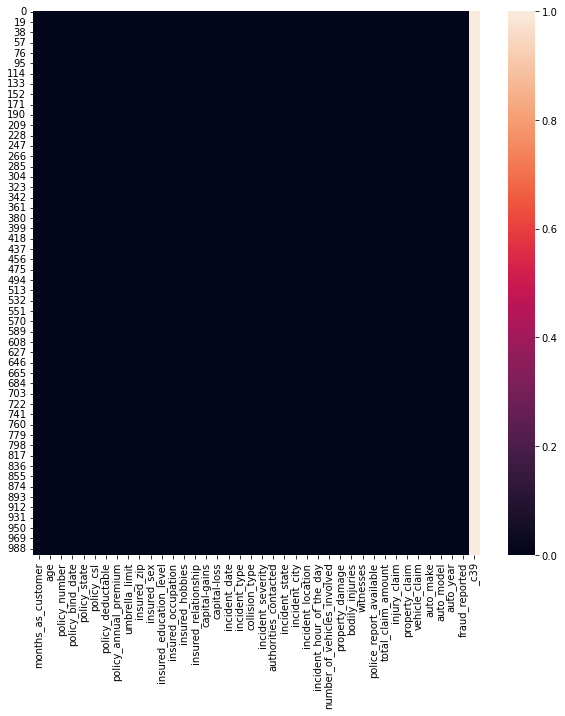

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [15]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Null value handling

In [16]:
df.drop(["_c39"],inplace=True,axis=1)

In [17]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [18]:
# Null values are removed

# Univariate analysis

<AxesSubplot:xlabel='policy_state', ylabel='count'>

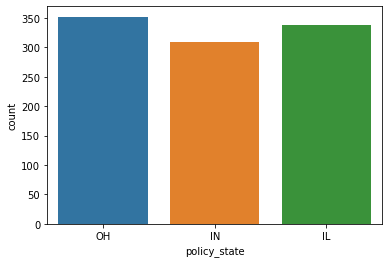

In [19]:
sns.countplot(df ['policy_state'])

In [20]:
# OH,IN,IL have equal amount of data

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

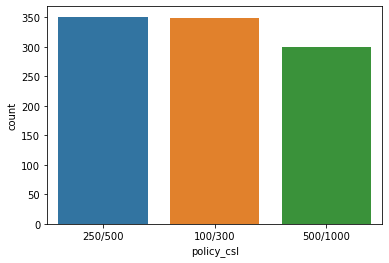

In [21]:
sns.countplot(df['policy_csl'])

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

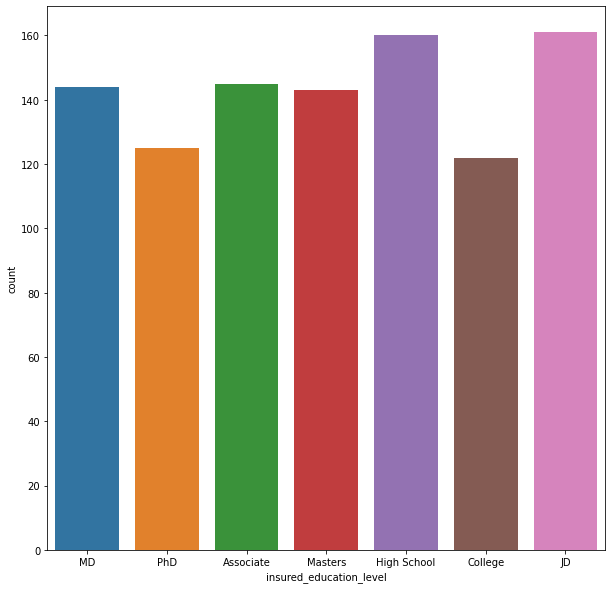

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(df[ 'insured_education_level'])

In [23]:
# High School is higher compared to other education level

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

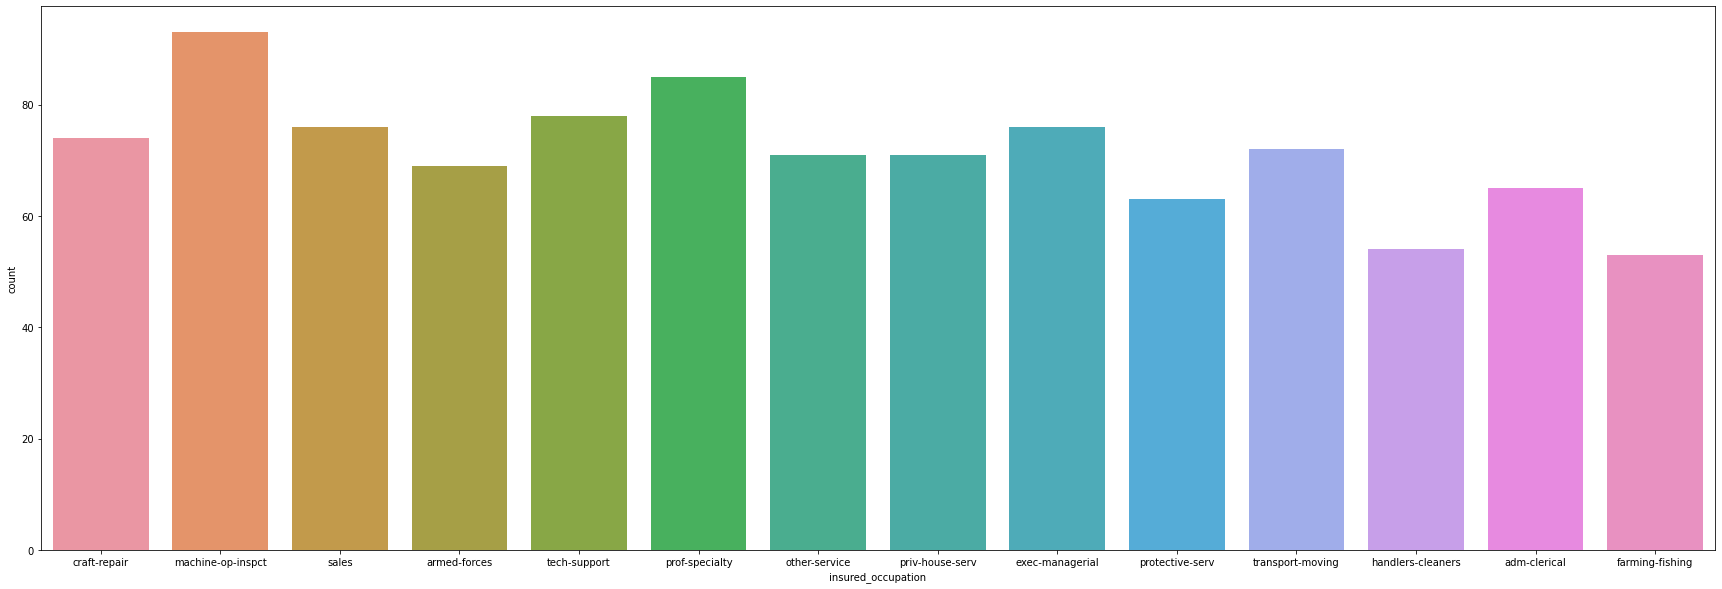

In [24]:
plt.figure(figsize=(30,10))
sns.countplot(df['insured_occupation'])

In [25]:
# Machine-op-inspct occupation is higher compared to others

<AxesSubplot:xlabel='incident_type', ylabel='count'>

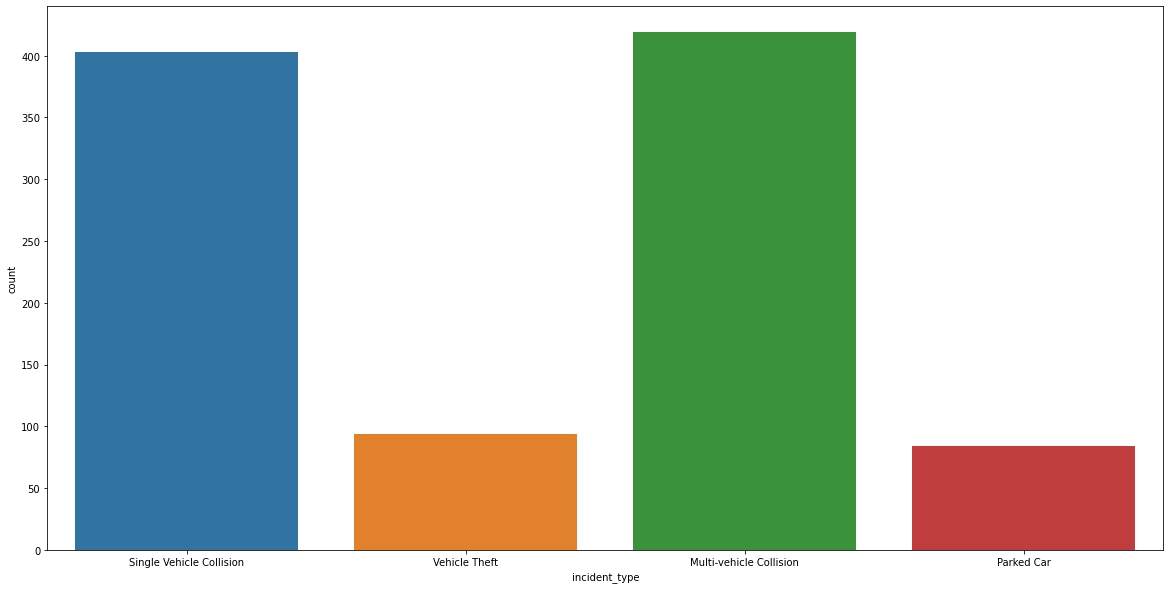

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(df['incident_type'])

In [27]:
# MultiVechile Collision is high compared to other incidents

<AxesSubplot:xlabel='collision_type', ylabel='count'>

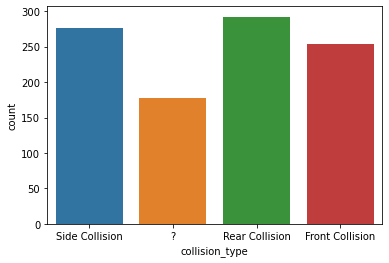

In [28]:
sns.countplot(df['collision_type'])

In [29]:
# Rear Collision is high compared to other collisoins

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

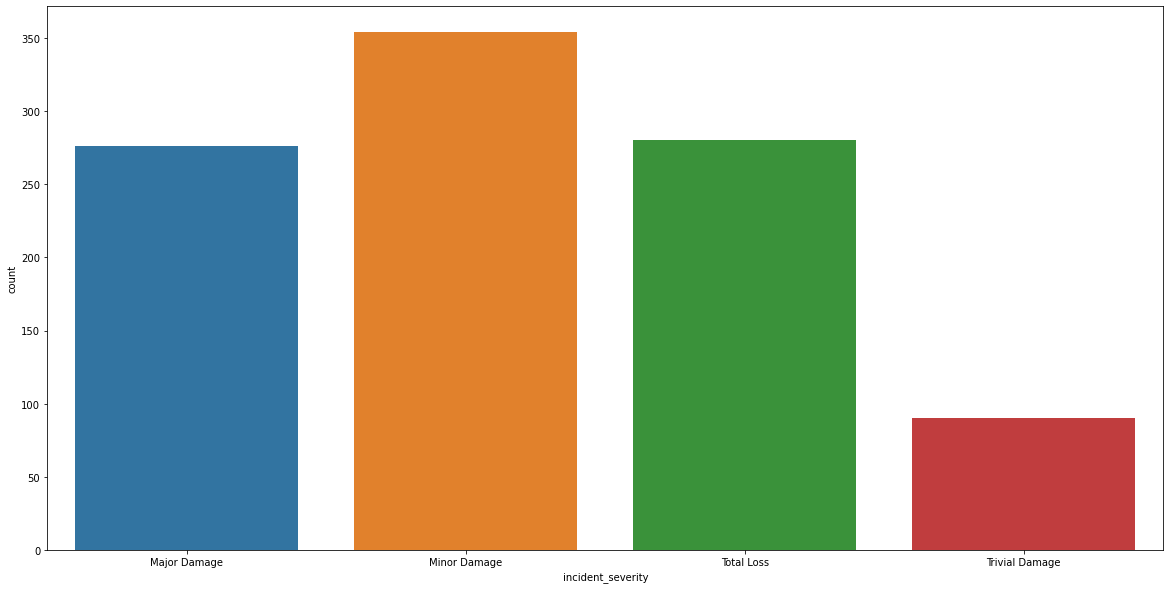

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(df['incident_severity'])

In [31]:
# Minor Damage in incident_severity is high copared to others

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

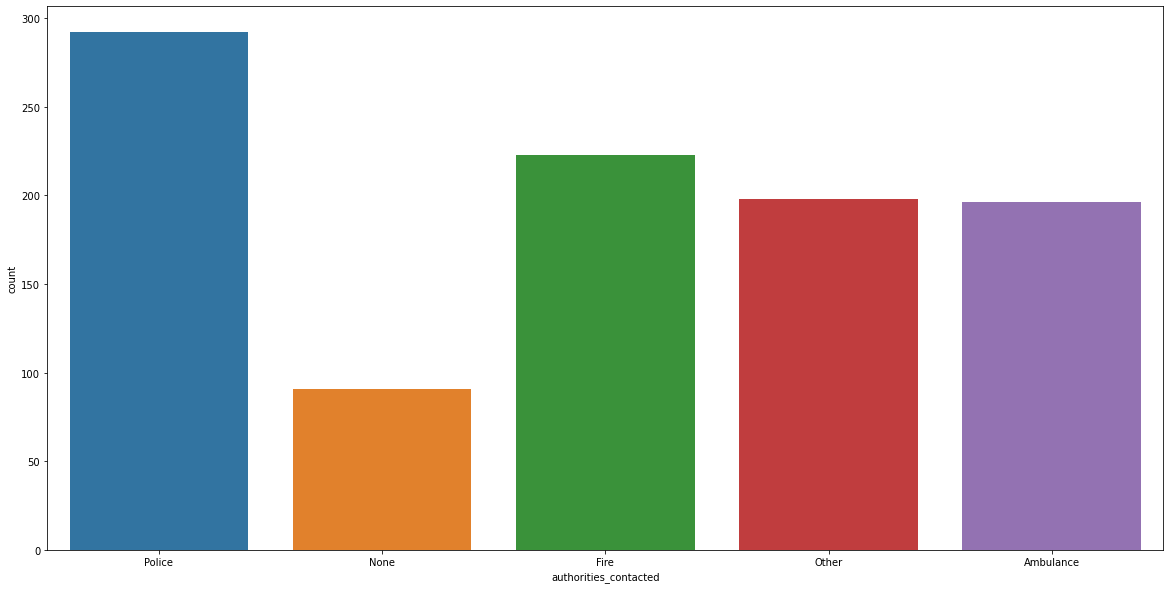

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(df['authorities_contacted'])

In [33]:
# Police is contacted most in authorities contacted

<AxesSubplot:xlabel='incident_state', ylabel='count'>

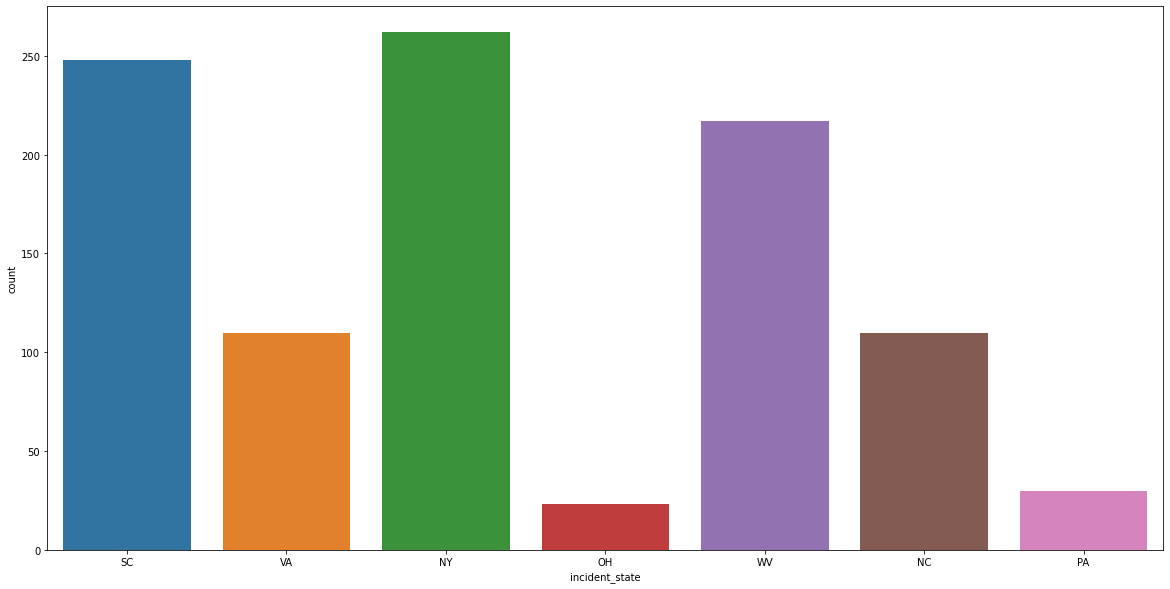

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(df['incident_state'])

In [35]:
# NY is higher incident state compared to others

<AxesSubplot:xlabel='incident_city', ylabel='count'>

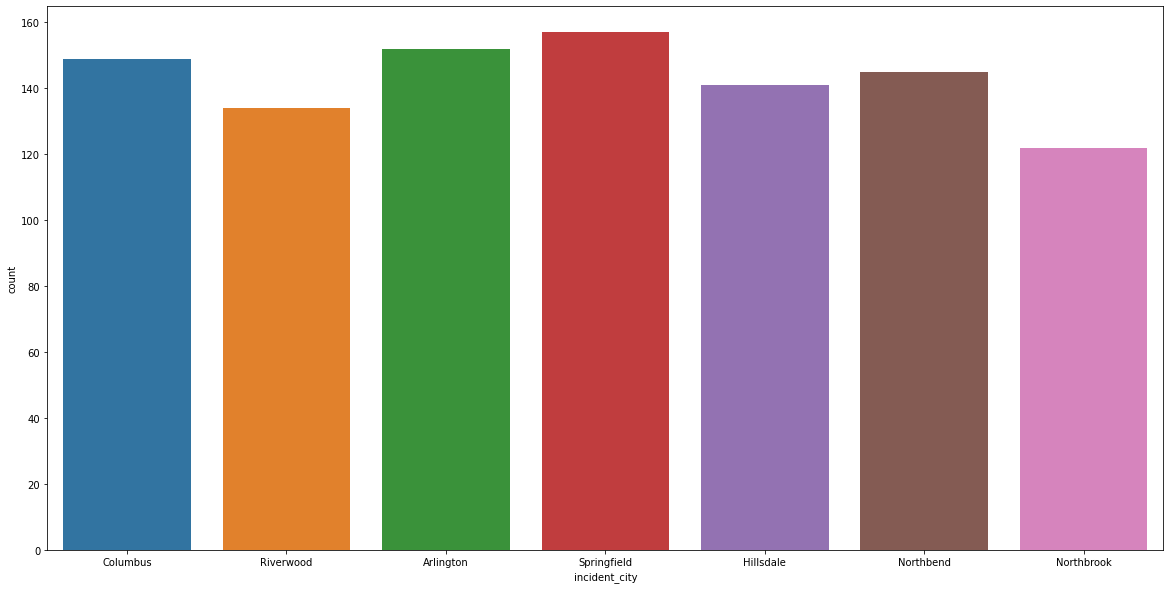

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(df['incident_city'])

In [37]:
# Springfield incident city is higher compared to other city

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

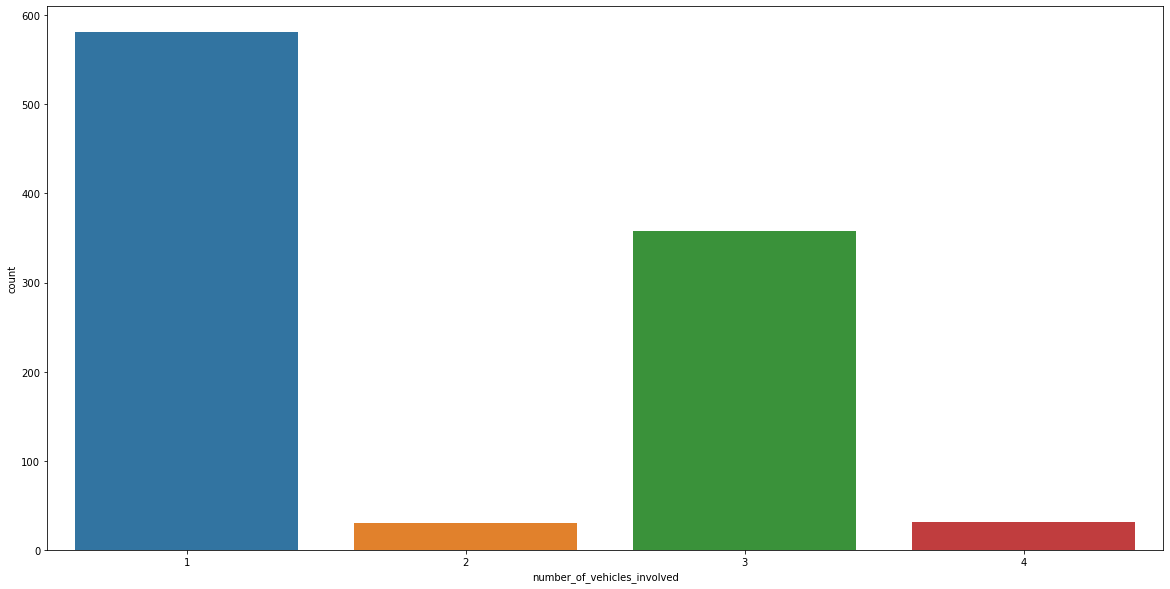

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(df['number_of_vehicles_involved'])

In [39]:
# Vehicle involved in collision is 1 most

<AxesSubplot:xlabel='property_damage', ylabel='count'>

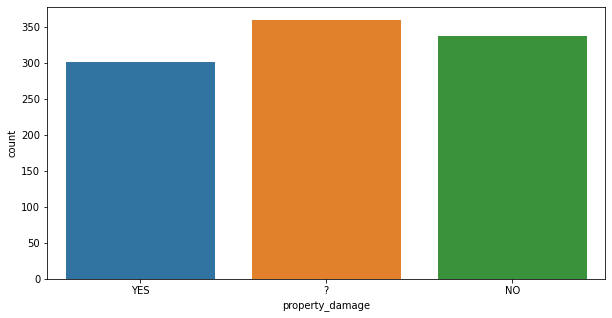

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(df['property_damage'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

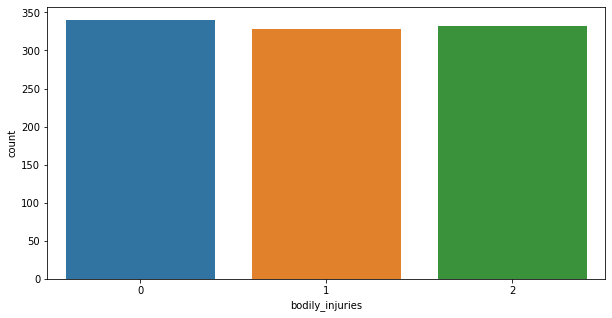

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df['bodily_injuries'])

In [42]:
# Body injuries is 0 most

<AxesSubplot:xlabel='witnesses', ylabel='count'>

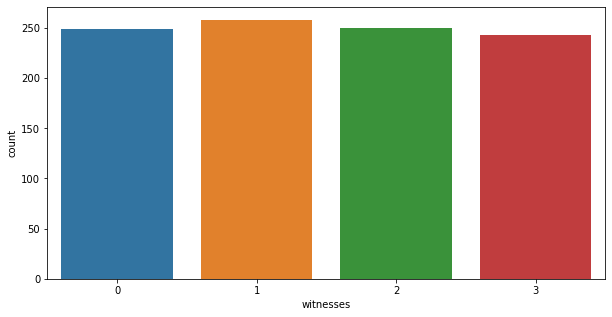

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(df['witnesses'])

In [44]:
# 'witnesses' are mostly 1

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

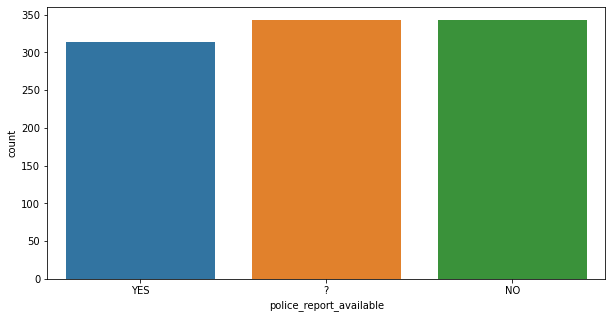

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df['police_report_available'])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

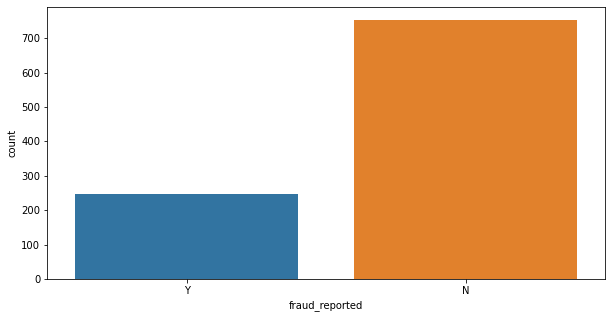

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(df[ 'fraud_reported'])

In [47]:
# No fraud Reported in most of the cases

# Bivariate Analysis

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

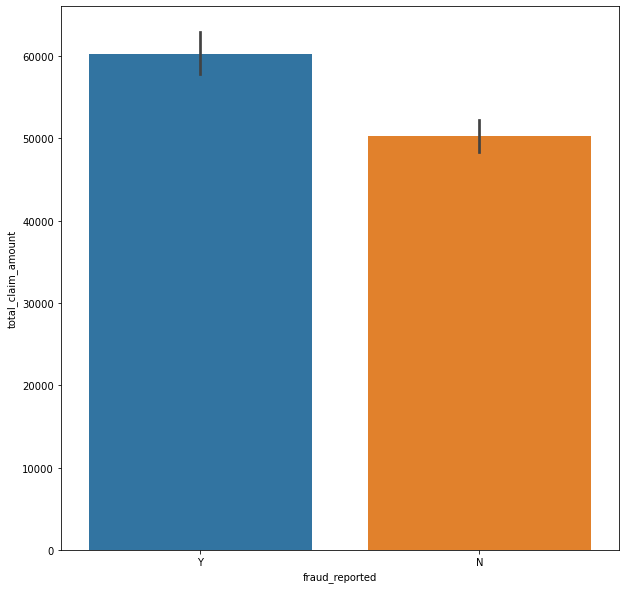

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(df[ 'fraud_reported'],df[ 'total_claim_amount'])

In [49]:
# Claim amount is higher for fraud cases

<AxesSubplot:xlabel='umbrella_limit', ylabel='fraud_reported'>

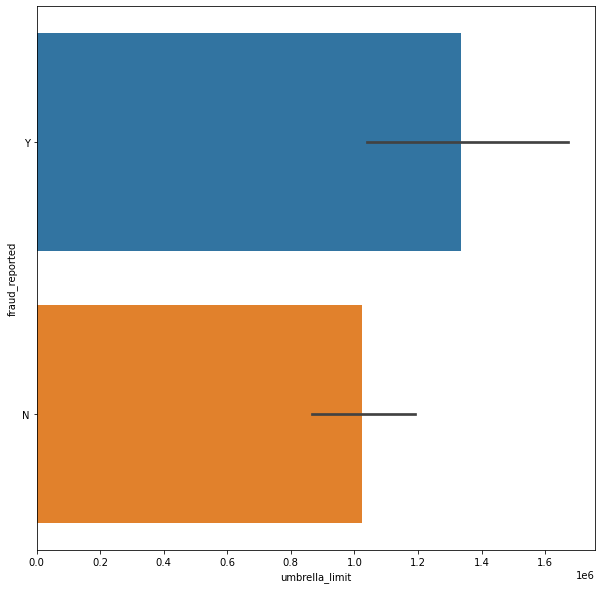

In [50]:
plt.figure(figsize=(10,10))
sns.barplot(df['umbrella_limit'],df[ 'fraud_reported'])

In [51]:
# Fraud cases have higher umbrella limit

<AxesSubplot:xlabel='collision_type', ylabel='fraud_reported'>

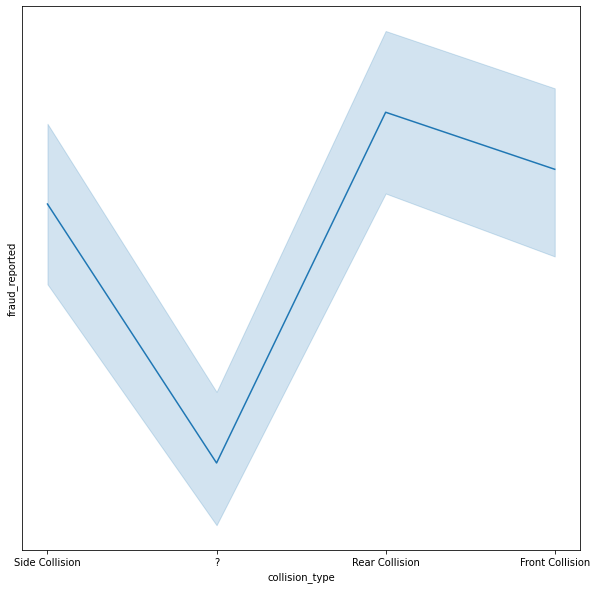

In [52]:
plt.figure(figsize=(10,10))
sns.lineplot(df[ 'collision_type'],df[ 'fraud_reported'])

In [53]:
# Rear collision have higher fraud claims

<AxesSubplot:xlabel='witnesses', ylabel='fraud_reported'>

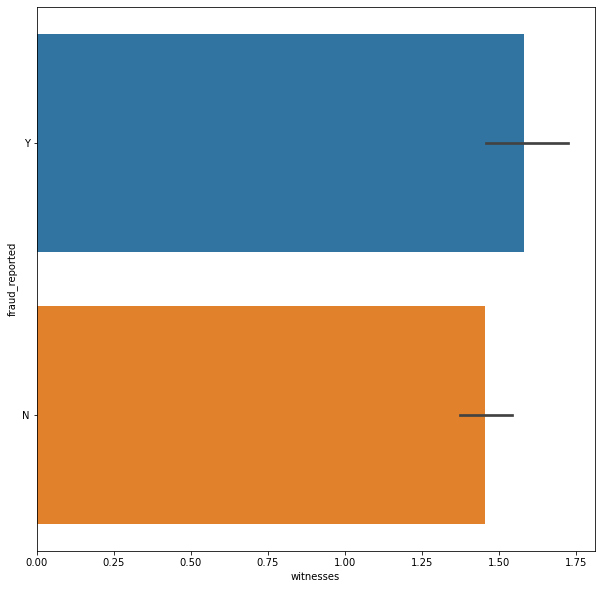

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(df[ 'witnesses'],df[ 'fraud_reported'])

<AxesSubplot:xlabel='witnesses', ylabel='fraud_reported'>

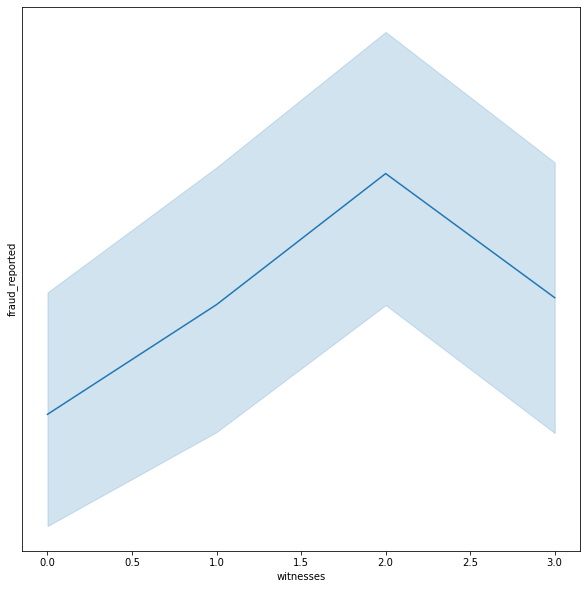

In [55]:
plt.figure(figsize=(10,10))
sns.lineplot(df[ 'witnesses'],df[ 'fraud_reported'])

In [56]:
# Fraud reported is higher with increase in witness

<AxesSubplot:xlabel='police_report_available', ylabel='fraud_reported'>

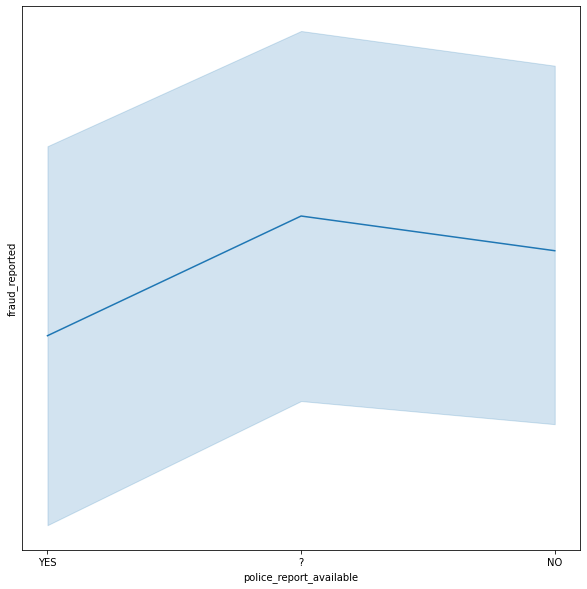

In [57]:
plt.figure(figsize=(10,10))
sns.lineplot(df['police_report_available'],df[ 'fraud_reported'])

In [58]:
# Fraud report is higher without police report

<AxesSubplot:xlabel='insured_sex', ylabel='fraud_reported'>

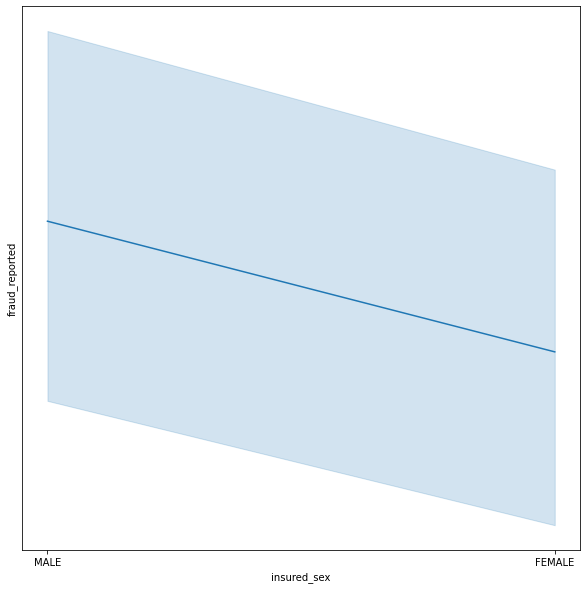

In [59]:
plt.figure(figsize=(10,10))
sns.lineplot(df['insured_sex'],df[ 'fraud_reported'])

In [60]:
# Male have higher fraud claims

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

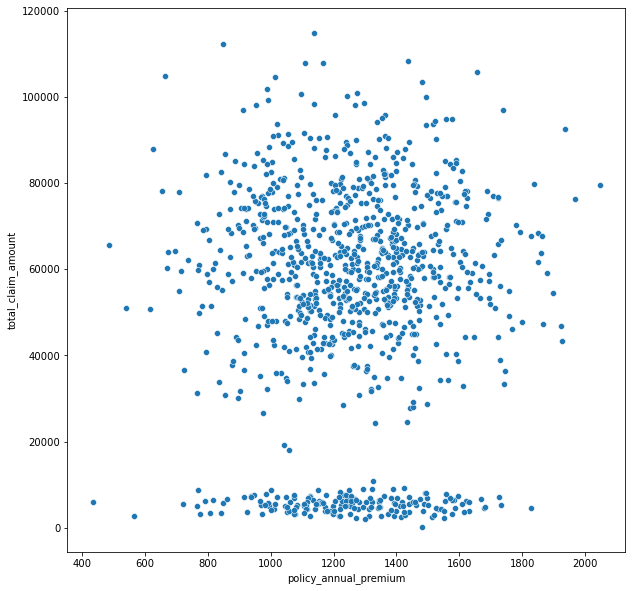

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['policy_annual_premium'],df['total_claim_amount'])

In [62]:
# Totoal Claim amount is positively correlated with policy annual premium

<AxesSubplot:xlabel='incident_type', ylabel='total_claim_amount'>

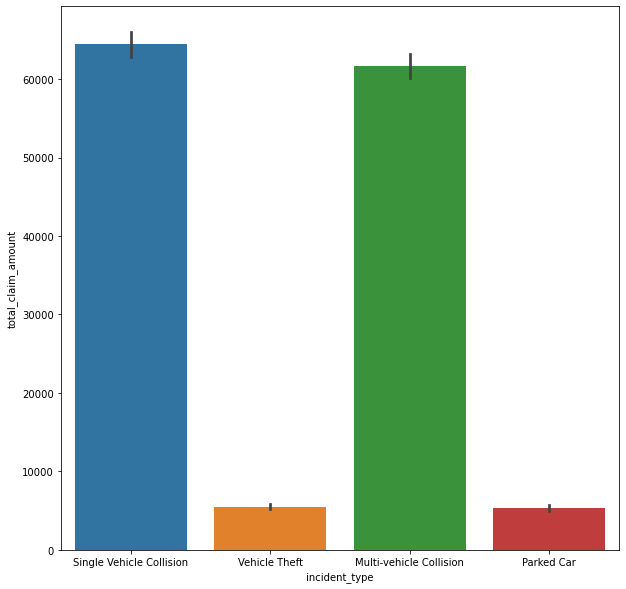

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(df['incident_type'],df['total_claim_amount'])

<AxesSubplot:xlabel='incident_type', ylabel='total_claim_amount'>

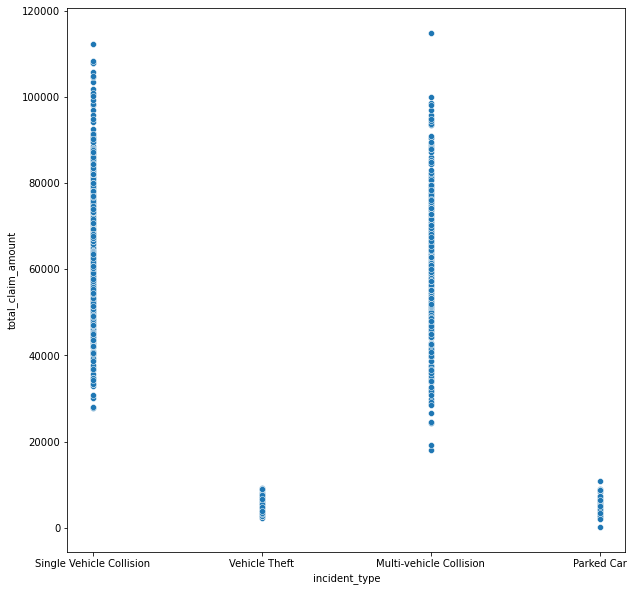

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['incident_type'],df['total_claim_amount'])

In [65]:
# For Single vehicle collison total claim amount is higher

<AxesSubplot:xlabel='incident_city', ylabel='total_claim_amount'>

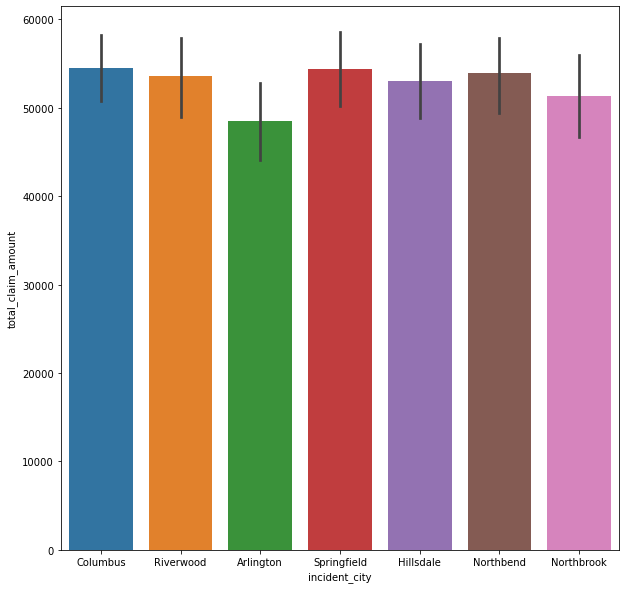

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(df['incident_city'],df[ 'total_claim_amount'])

<AxesSubplot:xlabel='incident_city', ylabel='total_claim_amount'>

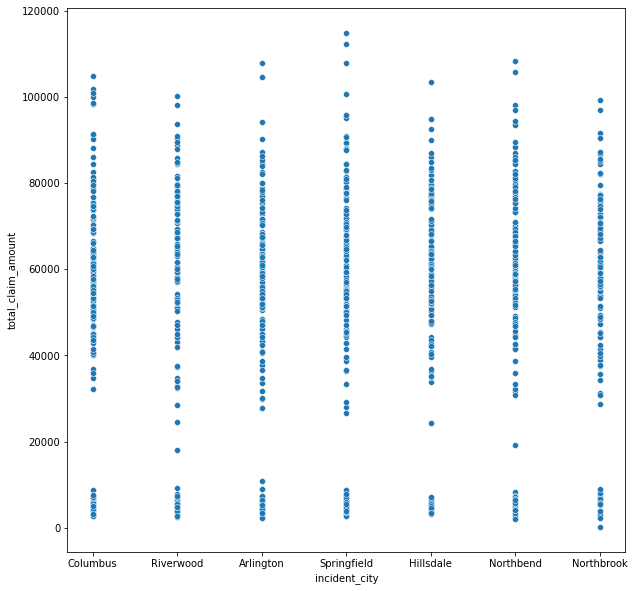

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['incident_city'],df[ 'total_claim_amount'])

In [68]:
# SpringFieldIncident_city has higer claim amount

<AxesSubplot:xlabel='incident_type', ylabel='fraud_reported'>

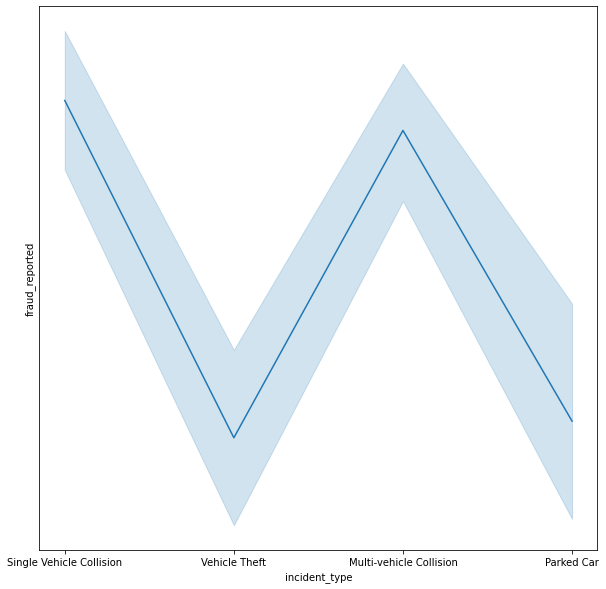

In [69]:
plt.figure(figsize=(10,10))
sns.lineplot(df[ 'incident_type'],df[ 'fraud_reported'])

In [70]:
# Single Vehicle Collison and Mult-Vehicle collision has higher fraud reported

<AxesSubplot:xlabel='insured_occupation', ylabel='fraud_reported'>

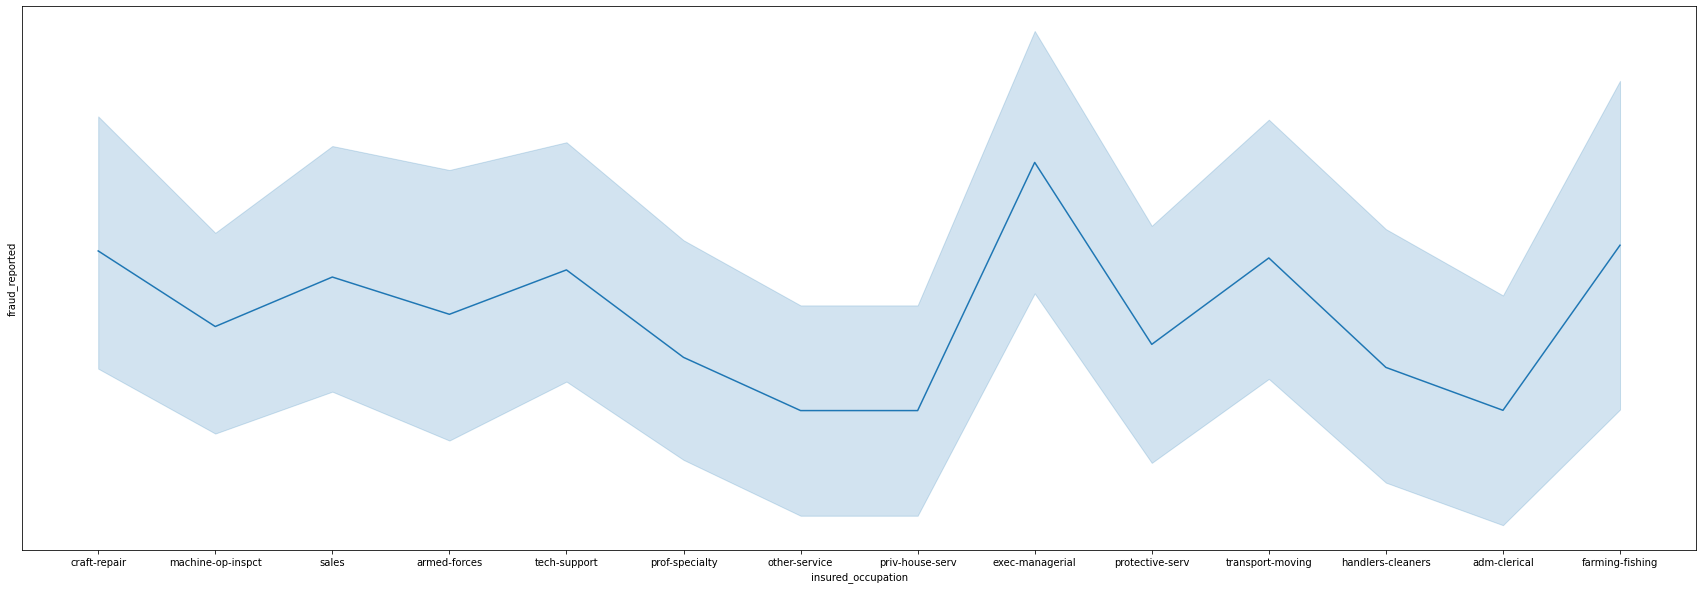

In [71]:
plt.figure(figsize=(30,10))
sns.lineplot(df['insured_occupation'],df['fraud_reported'])

In [72]:
# exec-manageral occupation has higher fruad reported

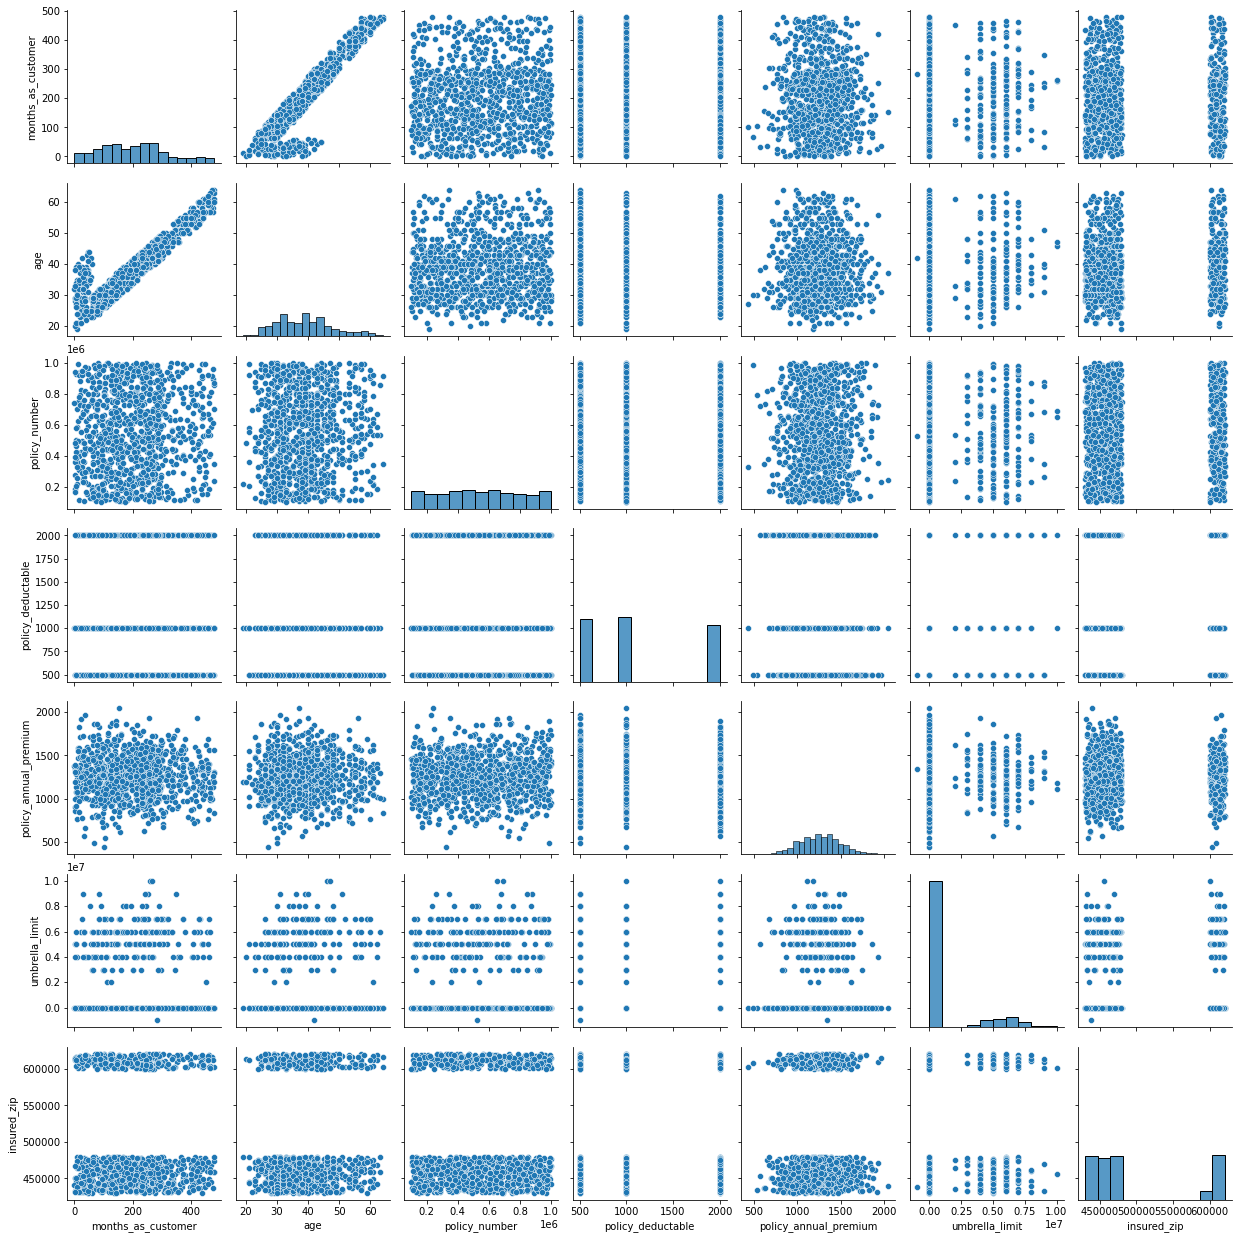

In [73]:
sns.pairplot(df.iloc[:,0:15])

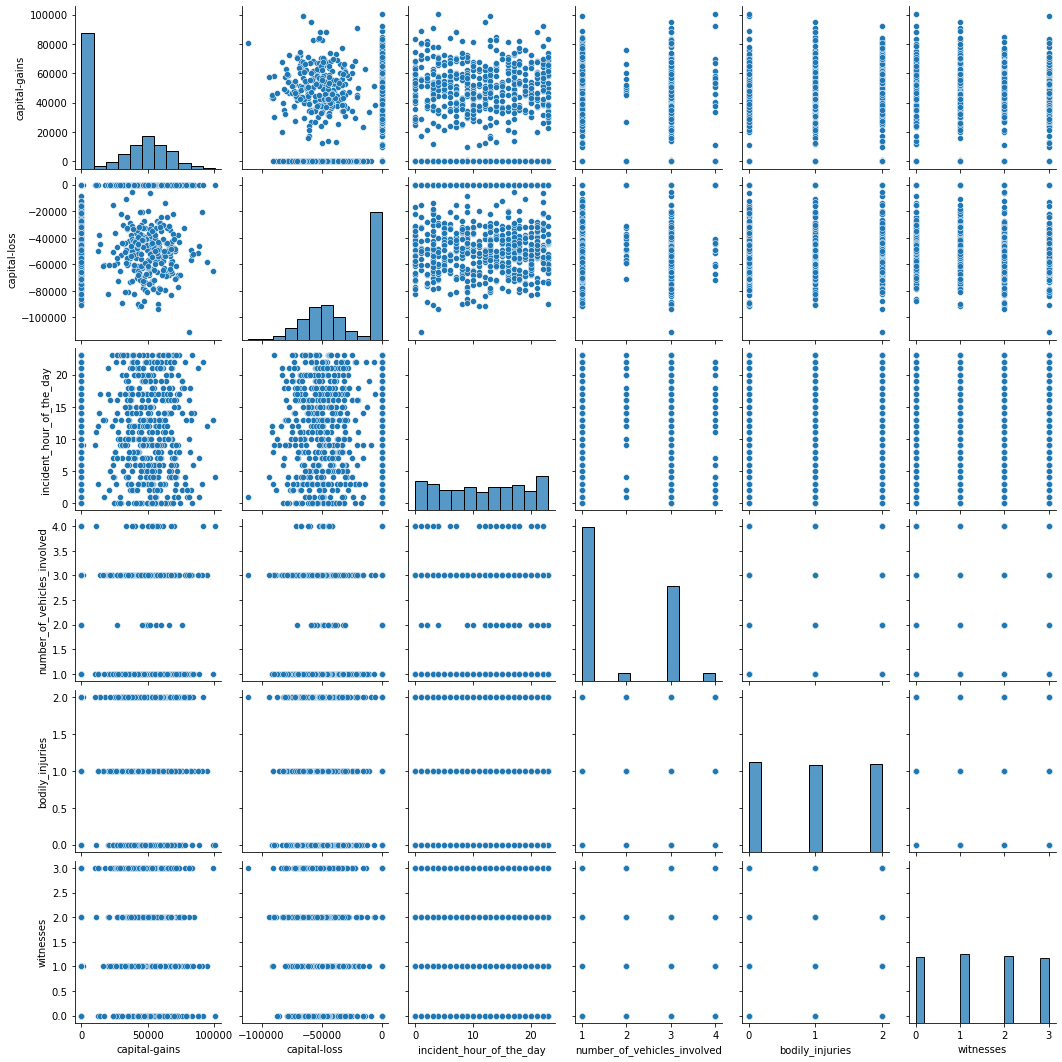

In [74]:
sns.pairplot(df.iloc[:,15:30])

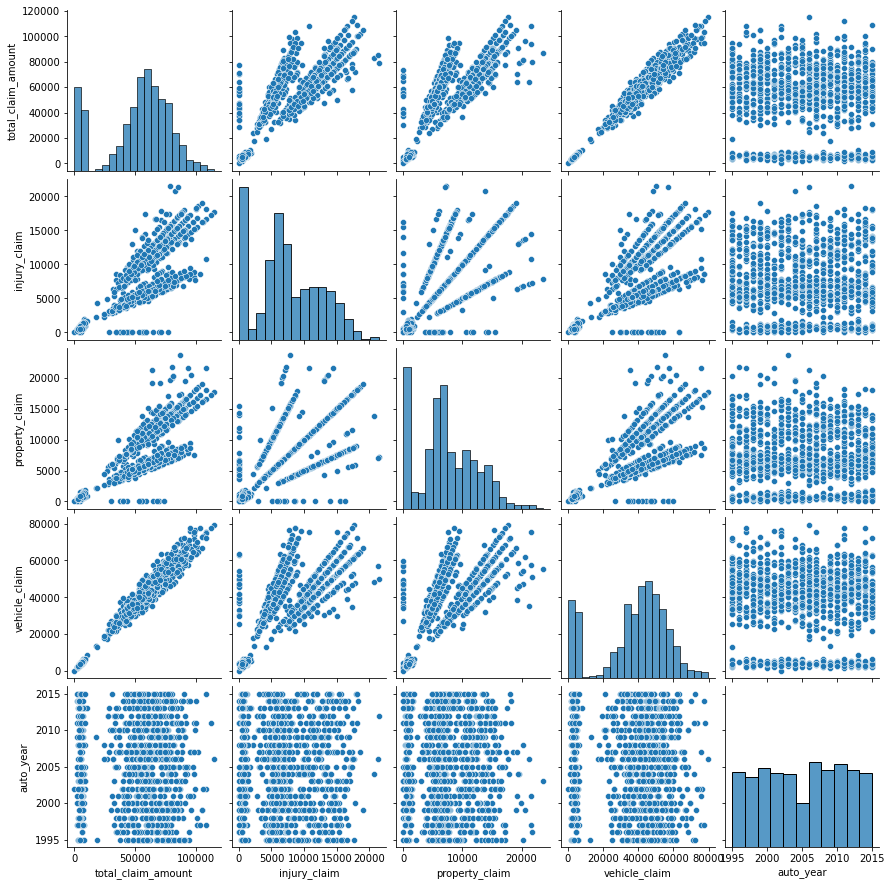

In [75]:
sns.pairplot(df.iloc[:,30:40])

# Encoding

In [76]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [78]:
list1 = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date',
         'incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage',
         'police_report_available','auto_make','auto_model','fraud_reported']

In [79]:
df["Day"] = pd.to_datetime(df['policy_bind_date']).dt.day
df["Month"] = pd.to_datetime(df['policy_bind_date']).dt.month
df["Year"] = pd.to_datetime(df['policy_bind_date']).dt.year

In [80]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [81]:
df1 = pd.DataFrame()
for i in list1:
    df1[i] = df[i]

In [82]:
a = pd.get_dummies(df1)

In [83]:
df['fraud_reported'] = LabelEncoder().fit_transform(df["fraud_reported"])

In [84]:
df.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type',
          'collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make',
         'auto_model'],inplace=True,axis=1)

In [85]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
fraud_reported                   int32
Day                              int64
Month                            int64
Year                             int64
dtype: object

In [86]:
# we have succesfully converted all object data to numeric data.

<AxesSubplot:>

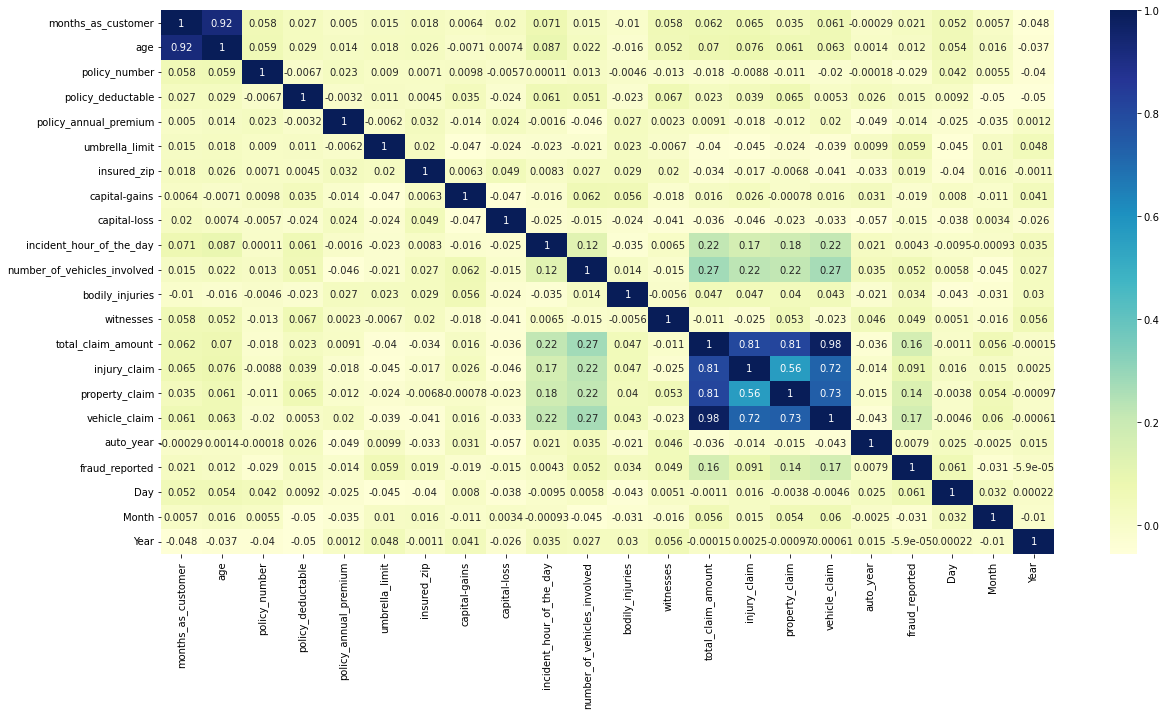

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [88]:
df.corr()['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
Day                            0.060643
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
Year                          -0.000059
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
policy_number                 -0.029443
Month                         -0.030829
Name: fraud_reported, dtype: float64

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

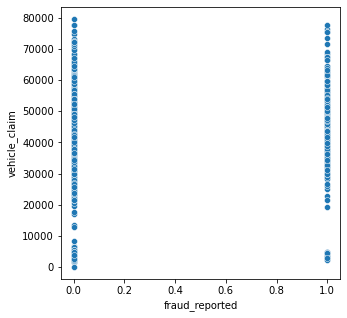

In [89]:
plt.figure(figsize=(5,5))
sns.scatterplot(df[ 'fraud_reported'],df[ 'vehicle_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

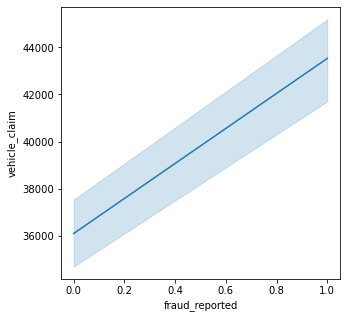

In [90]:
plt.figure(figsize=(5,5))
sns.lineplot(df[ 'fraud_reported'],df[ 'vehicle_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

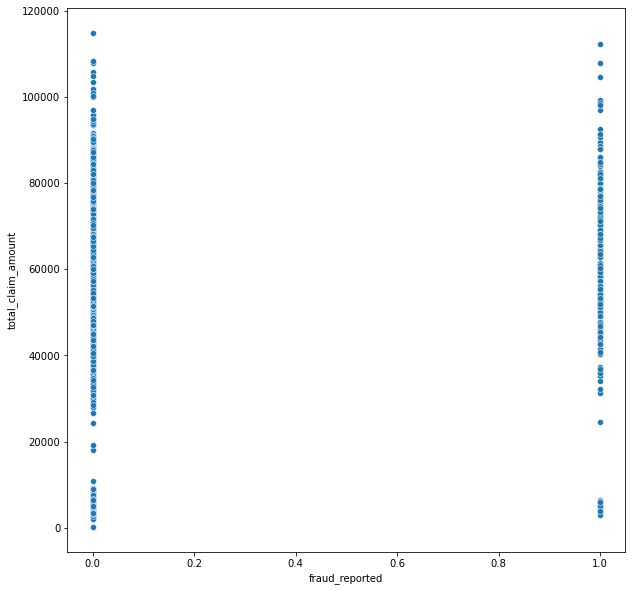

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(df[ 'fraud_reported'],df[ 'total_claim_amount'])

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

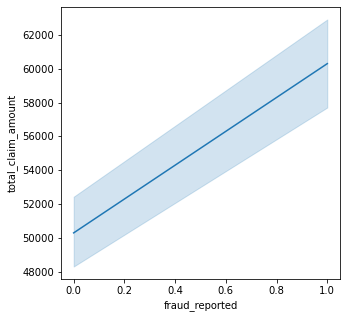

In [92]:
plt.figure(figsize=(5,5))
sns.lineplot(df[ 'fraud_reported'],df[ 'total_claim_amount'])

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

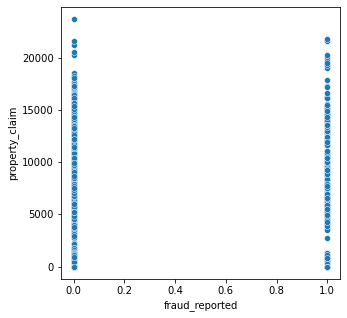

In [93]:
plt.figure(figsize=(5,5))
sns.scatterplot(df[ 'fraud_reported'],df[ 'property_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

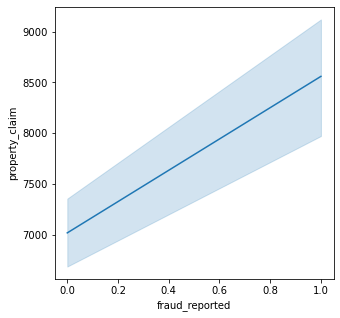

In [94]:
plt.figure(figsize=(5,5))
sns.lineplot(df[ 'fraud_reported'],df[ 'property_claim'])

# Skewness

In [95]:
dc1 = df.drop(['fraud_reported',"Day","Month","Year"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

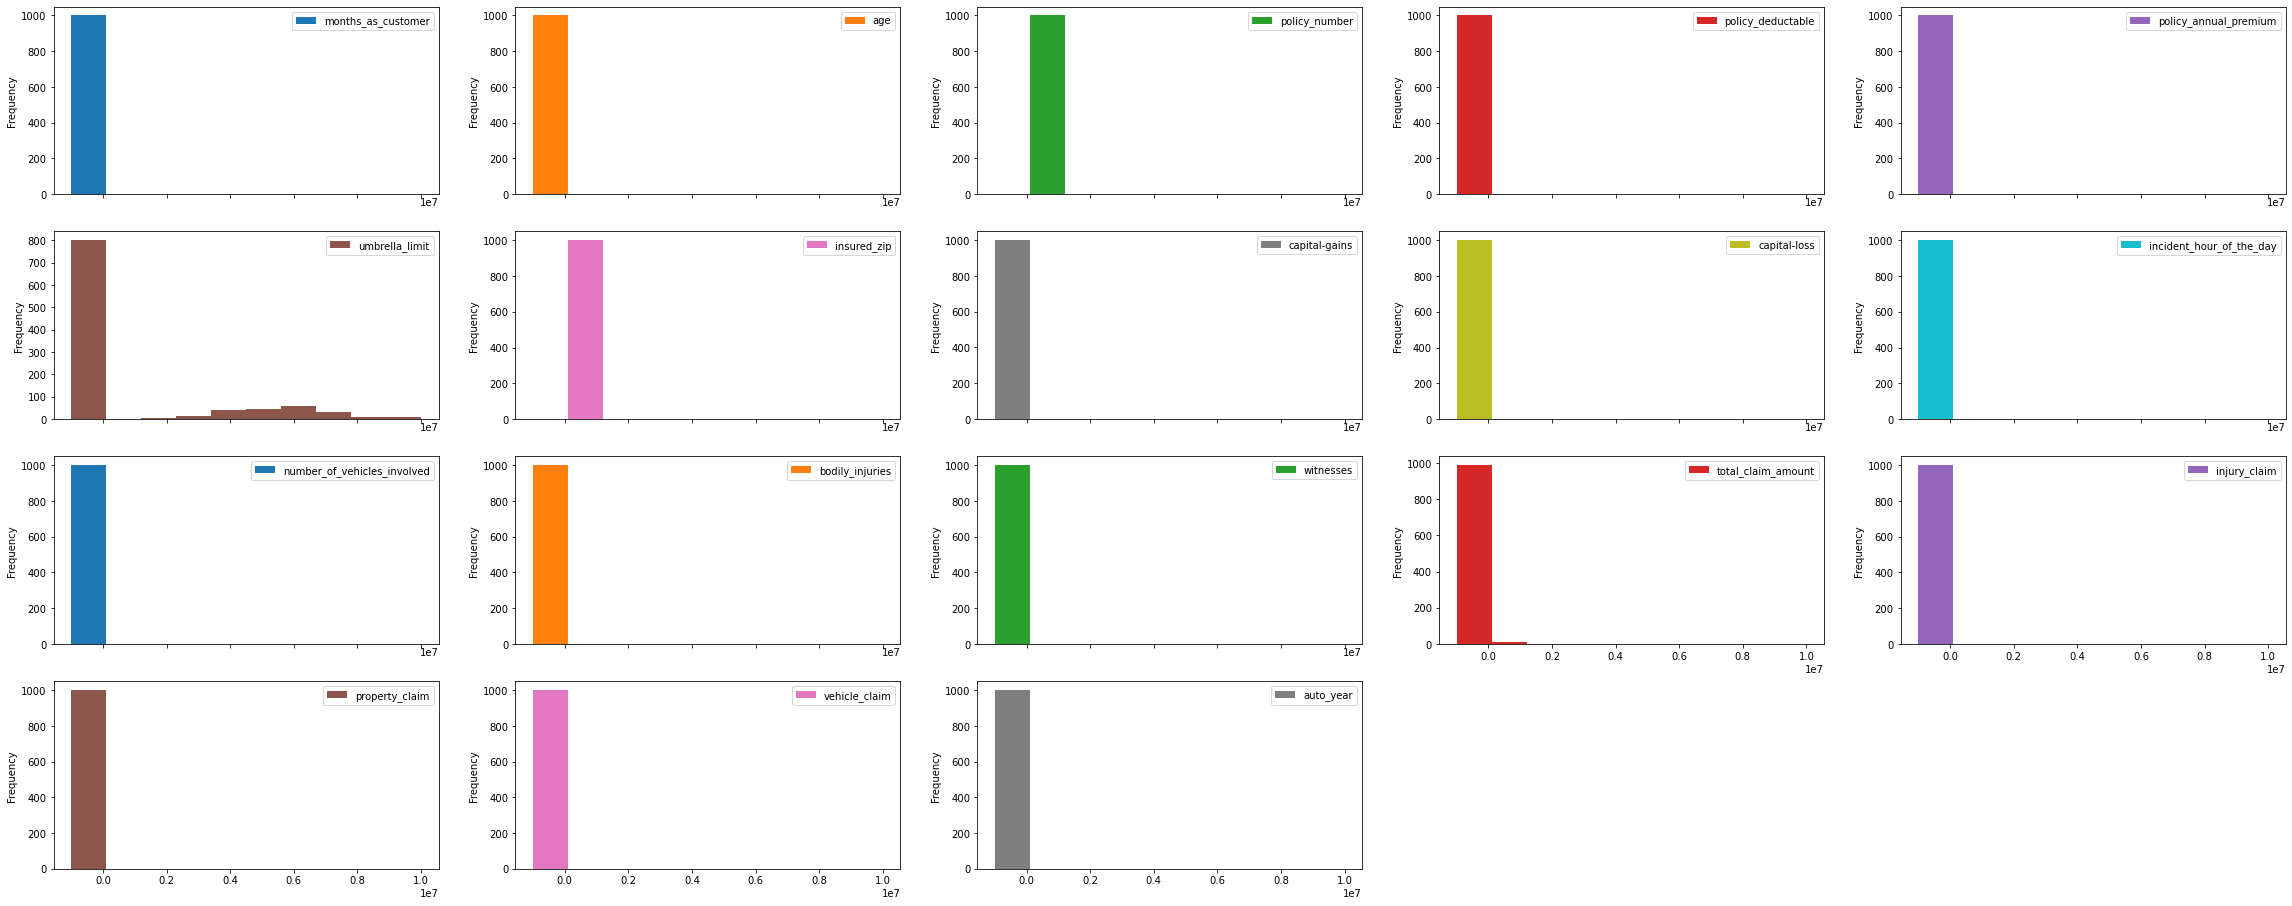

In [96]:
dc1.plot(kind="hist",subplots=True,layout=(5,5),figsize=(40,20))

In [97]:
dc1.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
injury_claim                   0.264811
policy_number                  0.038991
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
incident_hour_of_the_day      -0.035584
auto_year                     -0.048289
capital-loss                  -0.391472
total_claim_amount            -0.594582
vehicle_claim                 -0.621098
dtype: float64

In [98]:
# Many features have skewness

In [99]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [100]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)
dc2.skew()

months_as_customer            -0.135661
age                           -0.001945
policy_number                 -0.160374
policy_deductable              0.023988
policy_annual_premium          0.004758
umbrella_limit                -7.865930
insured_zip                    0.000000
capital-gains                  0.038722
capital-loss                   0.090488
incident_hour_of_the_day      -0.256957
number_of_vehicles_involved    0.363693
bodily_injuries               -0.128799
witnesses                     -0.153648
total_claim_amount            -0.510354
injury_claim                  -0.415781
property_claim                -0.358814
vehicle_claim                 -0.522718
auto_year                     -0.012491
dtype: float64

In [101]:
# we have removed skewness

# Outlier removal

months_as_customer                AxesSubplot(0.125,0.125;0.036215x0.755)
age                            AxesSubplot(0.168458,0.125;0.036215x0.755)
policy_number                  AxesSubplot(0.211916,0.125;0.036215x0.755)
policy_deductable              AxesSubplot(0.255374,0.125;0.036215x0.755)
policy_annual_premium          AxesSubplot(0.298832,0.125;0.036215x0.755)
umbrella_limit                  AxesSubplot(0.34229,0.125;0.036215x0.755)
insured_zip                    AxesSubplot(0.385748,0.125;0.036215x0.755)
capital-gains                  AxesSubplot(0.429206,0.125;0.036215x0.755)
capital-loss                   AxesSubplot(0.472664,0.125;0.036215x0.755)
incident_hour_of_the_day       AxesSubplot(0.516121,0.125;0.036215x0.755)
number_of_vehicles_involved    AxesSubplot(0.559579,0.125;0.036215x0.755)
bodily_injuries                AxesSubplot(0.603037,0.125;0.036215x0.755)
witnesses                      AxesSubplot(0.646495,0.125;0.036215x0.755)
total_claim_amount             AxesSub

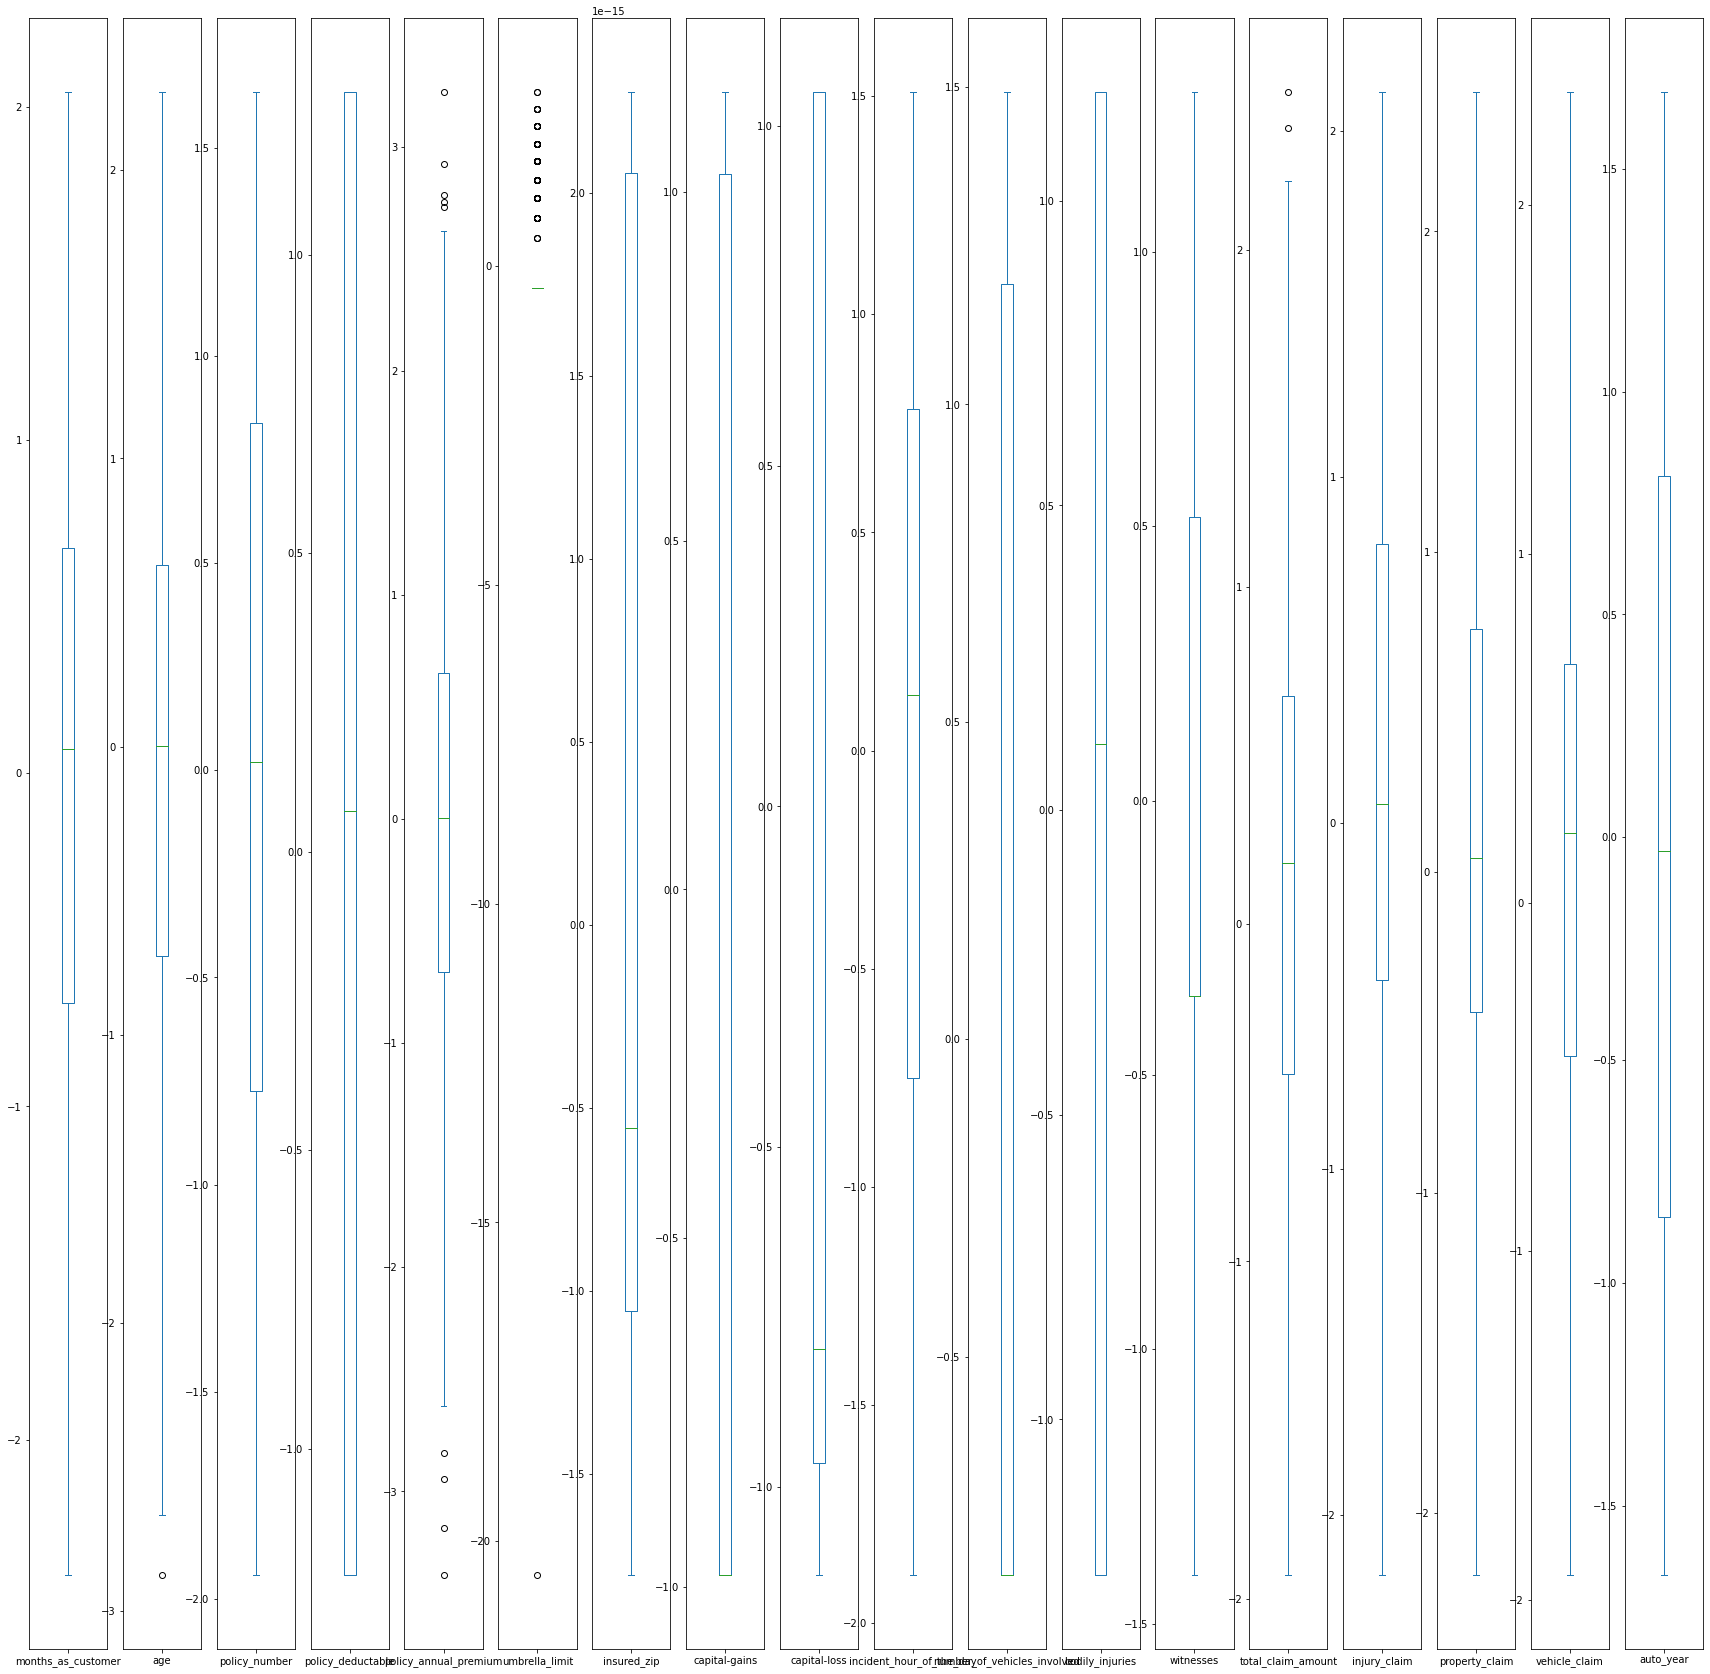

In [102]:
dc2.plot(kind="box",subplots=True,figsize=(30,30))

In [103]:
dc2.shape

(1000, 18)

In [104]:
from scipy.stats import zscore
z = np.abs(zscore(dc2))

In [105]:
np.where(z>3)

(array([229, 248, 290, 763], dtype=int64), array([4, 4, 5, 4], dtype=int64))

In [106]:
df1 = dc2

In [107]:
df1.drop([229, 248, 290, 763],axis=0,inplace=True)

In [108]:
df1.shape

(996, 18)

In [109]:
# The outliers are removed

# Data loss

In [110]:
((1000-996)/1000)*100

0.4

# Creating categorical data dataframe

In [111]:
dfd = pd.DataFrame()
dfd['fraud_reported'] = df['fraud_reported']
dfd["Day"] = df["Day"]
dfd["Month"] = df["Month"]
dfd["Year"] = df["Year"]
dfd = dfd.join(a)
dfd.shape

(1000, 1211)

In [112]:
# Removing the outlier removed rows in categorical dataframe

In [113]:
dfd.drop([229, 248, 290, 763],axis=0,inplace=True)

In [114]:
dfd.shape

(996, 1211)

# Data Balancing

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

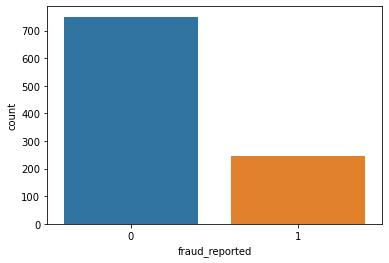

In [115]:
sns.countplot(dfd.iloc[:,0])

In [116]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [117]:
dfb = df1.join(dfd)
dx = dfb.drop("fraud_reported",axis=1)
dy = dfd.iloc[:,0]
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

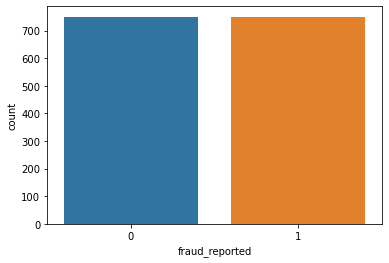

In [118]:
sns.countplot(y)

In [119]:
# Data is now balanced

# Standard Scaler

In [120]:
sc1=dft.iloc[:,0:18]

In [121]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x1=sc.fit_transform(sc1)
sc_final = pd.DataFrame(x1,columns=sc1.columns)

# PCA

In [122]:
from sklearn.decomposition import PCA

In [123]:
x_input = sc_final.join(dft.iloc[:,18:])

In [124]:
x_input.shape

(1500, 1228)

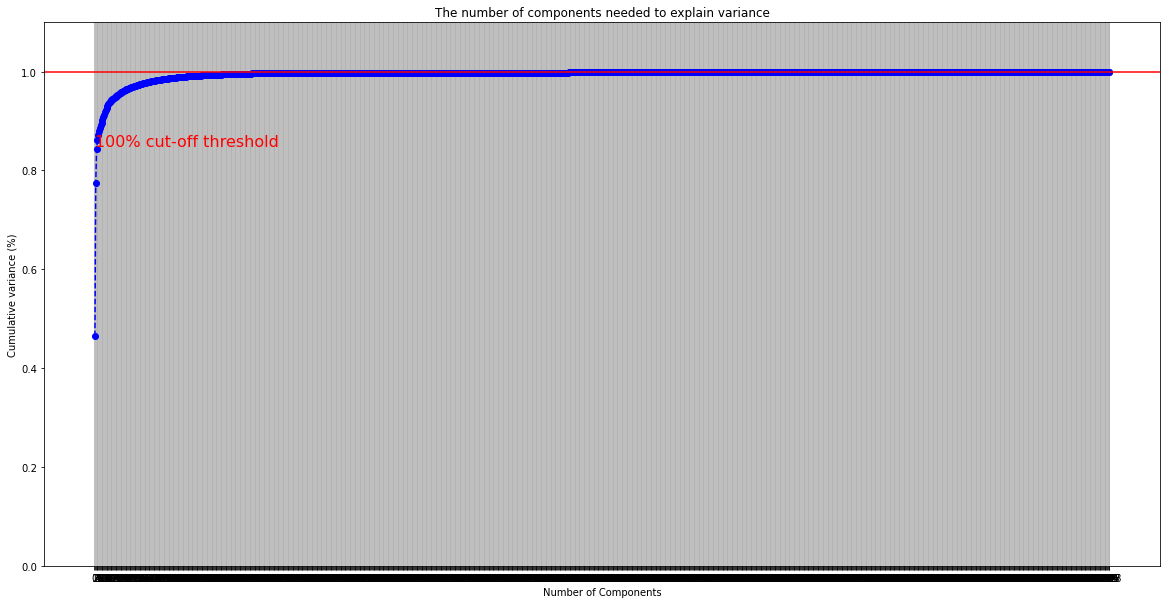

<Figure size 7200x1440 with 0 Axes>

In [125]:
pca = PCA().fit(dft)
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 1229, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 1229, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.figure(figsize=(100,20))
plt.show()

In [126]:
pd.DataFrame(yi)

,0
0,0.464726
1,0.774793
2,0.842412
3,0.861134
4,0.871874
5,0.879264
6,0.885572
7,0.891412
8,0.896805
9,0.902137


In [127]:
pca = PCA(n_components=1110)
p_final=pca.fit_transform(x_input)

In [128]:
x_final = pd.DataFrame(p_final)

# Multicolinearity Checking

In [129]:
# variance inflation factor

In [130]:
x_final.shape

(1500, 1110)

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
#vif = pd.DataFrame()
#vif["vif value"] = [variance_inflation_factor(x_final.values,a) for a in range(1110)]
#vif["feature names"] = x_final.columns


In [133]:
#vif.sort_values(by=["vif value"],ascending=False).head()

# Model Training

In [134]:
# Importing required libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Cross val score and accuracy score

In [135]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
lr=[]
fl = [dtc,knc,rfc,abc,lr]

oo=0

for i in algo:
    rand=0
    acc=0    
    
    for ii in range(10):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)

 the best random state is 7 and accuracy score is 0.8933333333333333 for algorithm DecisionTreeClassifier()
 the best random state is 4 and accuracy score is 0.6966666666666667 for algorithm KNeighborsClassifier()
 the best random state is 1 and accuracy score is 0.87 for algorithm RandomForestClassifier()
 the best random state is 6 and accuracy score is 0.9966666666666667 for algorithm AdaBoostClassifier()
 the best random state is 0 and accuracy score is 1.0 for algorithm LogisticRegression()


In [136]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
4,LogisticRegression(),1.000000,1.000000
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.996667,0.973333
0,DecisionTreeClassifier(),0.870000,0.844000
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.866667,0.836000
1,KNeighborsClassifier(),0.696667,0.640667


In [137]:
final_result.loc[4]["Algorithm Name"]

LogisticRegression()

# Support vector classifier

In [138]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.9966666666666667, the cross validation score is 0.9946666666666667 for SVC


In [139]:
# from all the classifier models Logistic Regression performed best with accuracy of 100 % and cross val score of 100 %

# HyperParameter Tunining

In [140]:
from sklearn.model_selection import GridSearchCV

In [142]:
lor = LogisticRegression()
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'dual': [True,False],
 'fit_intercept': [True,False],
             "max_iter":[100,150]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=1)
gsv = GridSearchCV(lor,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [143]:
gsv.best_params_

{'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [147]:
lor = LogisticRegression(dual=False,fit_intercept=True,max_iter=150,penalty='none',solver='saga')
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=15)
lor.fit(train_x,train_y)
pred = lor.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(lor,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 1.0, the cross validation score is 1.0 


In [148]:
# the accuracy score is 100% and cross validation score is 100%

In [149]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [150]:
print(confusion_matrix(test_y,pred))

[[150   0]
 [  0 150]]


# ROC_AUC_CURVE

In [151]:
from sklearn.metrics import plot_roc_curve,roc_auc_score

In [152]:
print(f'The Roc Auc Score is {roc_auc_score(test_y,pred)}')

The Roc Auc Score is 1.0


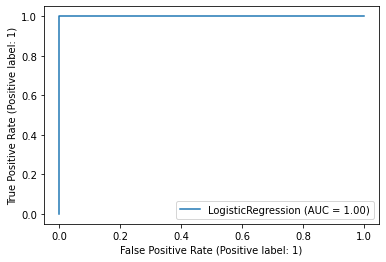

In [154]:
plot_roc_curve(lor,test_x,test_y)

# Saving the model

In [156]:
import joblib
joblib.dump(lor,"Insurance Claims.pkl")

['Insurance Claims.pkl']